# **Pràctica 2: Soroll i correlacions**

<hr>

**[1] Nom:**

**[1] NIU:**

**[1] mail (gmail):**

<hr>

**[2] Nom:**

**[2] NIU:**

**[2] mail (gmail):**

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr2_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr2_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr2_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr2_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>

# **Context**

En aquesta pràctica treballarem la generació de números aleatoris que segueixen una distribució uniforme, una distribució gaussiana, i el càlcul de factors de correlació.

### <font color='orange'>**> Python #1**</font>

1.   Genera 10000 punts que segueixin una distribució uniforme entre 0 i 10 i fes un histograma normalitzat.

2.   Genera 10000 punts que segueixin una distribució gaussiana centrada a 5 amb una $\sigma$ de 3 i fes un histograma normalitzat.

Pots fer servir les llibreries de scipy o de numpy:

```
import numpy as np
from scipy import stats
stats.norm.rvs(loc=5,scale=3,size=N)
stats.uniform.rvs(loc=0, scale=10, size=N)
np.random.uniform(low=0, high=10, size=N)
```



In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from IPython.display import display, Math

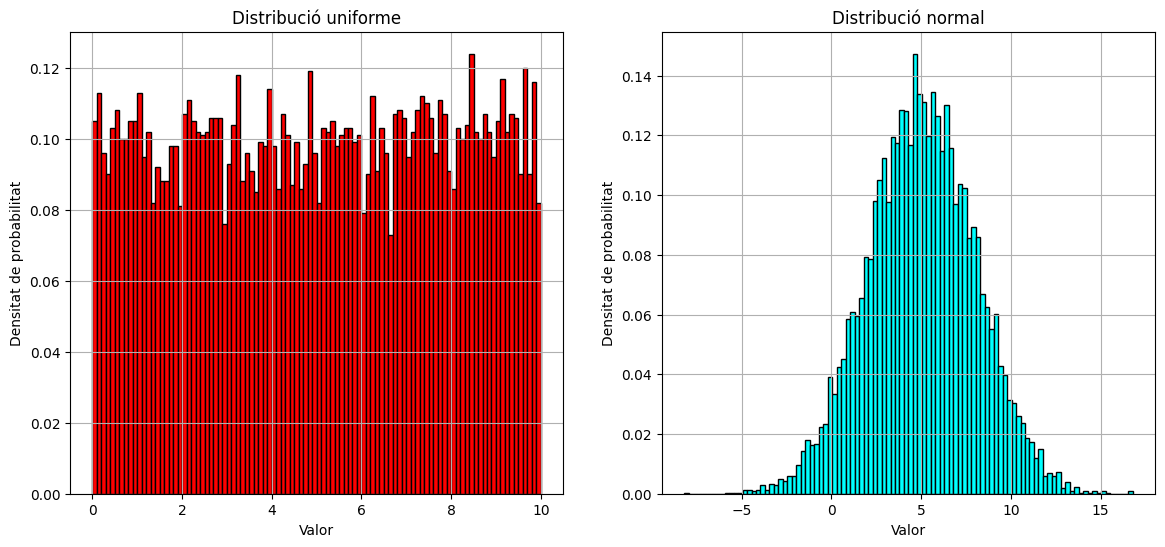

In [133]:
N = 10000

X_uniform = stats.uniform.rvs(loc=0, scale=10, size=N)
X_normal = stats.norm.rvs(loc=5, scale=3, size=N)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) #1 fila, 2 columnes, 1a posicio
plt.hist(X_uniform, density=True, bins=int(np.sqrt(N)), edgecolor='black', color='red')
# density per nomalitzar
# per trobar el nombre de bins adequat utilitzem sqrt(N)
plt.title('Distribució uniforme')
plt.xlabel('Valor')
plt.ylabel('Densitat de probabilitat')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(X_normal, density=True, bins=int(np.sqrt(N)), edgecolor='black', color='cyan')
plt.title('Distribució normal')
plt.xlabel('Valor')
plt.ylabel('Densitat de probabilitat')
plt.grid(True)

plt.show()

### <font color='orange'>**> Python #2**</font>

Genera dues llistes que siguin el quadrat dels resultats obtinguts abans, és a dir, si $X$ és la llista de valors uniformes, construeix una nova llista $Y=X^2$. Fes els dos histogrames normalitzats dels resultats que obtens.

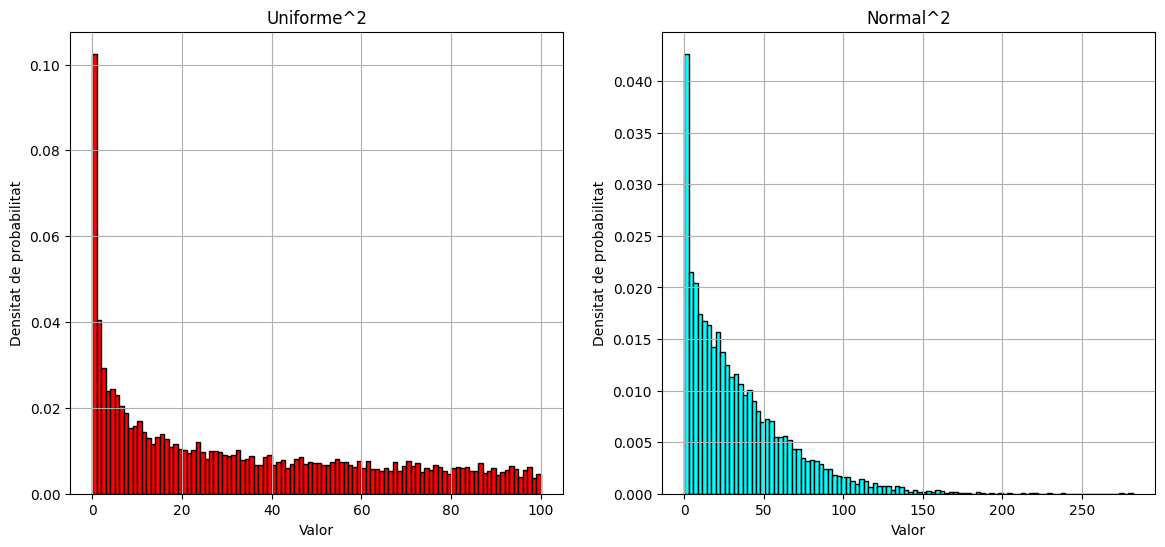

In [134]:
Y_uniform = X_uniform ** 2
Y_normal = X_normal ** 2

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(Y_uniform, bins=int(np.sqrt(N)), density=True, color='red', edgecolor='black')
plt.title('Uniforme^2')
plt.xlabel('Valor')
plt.ylabel('Densitat de probabilitat')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(Y_normal, bins=int(np.sqrt(N)), density=True, color='cyan', edgecolor='black')
plt.title('Normal^2')
plt.xlabel('Valor')
plt.ylabel('Densitat de probabilitat')
plt.grid(True)

plt.show()

### <font color='orange'>**> Python #3**</font>

Fes dues gràfiques on mostris (X,Y) per als dos casos. Calcula el factor de correlació entre les variables $X$ i $Y$ que has generat en els dos exemples anteriors.

<font color='orange'>**Nota**</font> Python té la funció $pearsonr$ per a calcular la correlació entre variables:

```
from scipy.stats import pearsonr
```
`?stats.pearsonr`

Aquesta funció retorna dos valors (Pearson correlation coefficient and p-value for testing non-correlation.). Us heu de quedar amb el primer d'ells. Perquè el segon cas té un factor de correlació menor?

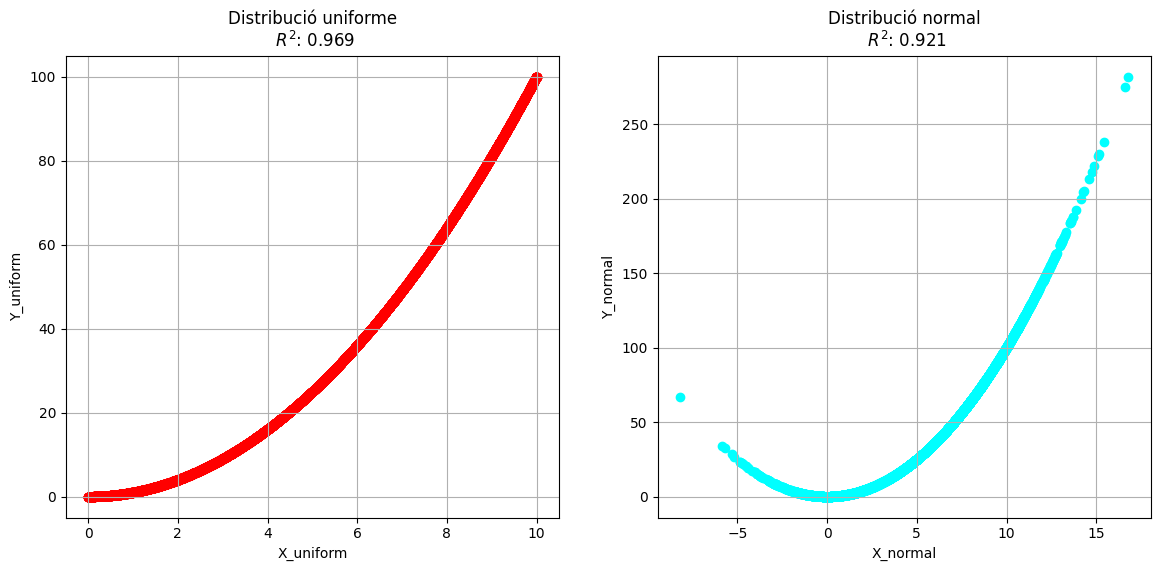

In [135]:
corr_uniform, _ = pearsonr(X_uniform, Y_uniform) #ignorem el 2 valor
corr_normal, _ = pearsonr(X_normal, Y_normal)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_uniform, Y_uniform, color='red')
plt.title(f'Distribució uniforme\n $R^2$: {corr_uniform:.3f}')
plt.xlabel('X_uniform')
plt.ylabel('Y_uniform')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_normal, Y_normal, color='cyan')
plt.title(f'Distribució normal\n $R^2$: {corr_normal:.3f}')
plt.xlabel('X_normal')
plt.ylabel('Y_normal')
plt.grid(True)

plt.show()

### <font color='green'>**> ENTREGA**</font>

En aquesta entrega hauràs de generar uns parells de punts, on un té un soroll associat i fa que es desviï d'una recta, és a dir:

$$
y_i = x_i + \epsilon_i
$$

Considerarem dos casos:

* No hi ha soroll $\Rightarrow \epsilon_i = 0$
* El soroll està distribuit com una normal $\Rightarrow \epsilon_i \sim N(0,Z)$

on Z es calcula amb les teves darreres dues xifres del teu NIU, dividit per 10!

Farem unes gràfiques (x,y), calcularem el factor de correlació, i graficarem les distribucions marginals en $x$ i $y$.

---

1) Fes una gràfica d'un conjunt de $N = 10000$ punts $(x,y)$ on els x estan equiespaiats en l'interval $[0,10]$ i $y_i = x_i$ **[1.5 punts]**. També fes un parell de gràfiques de les distribucions marginals en $x$ i $y$, fent histogrames amb 100 bins. **[1.5 punts]**

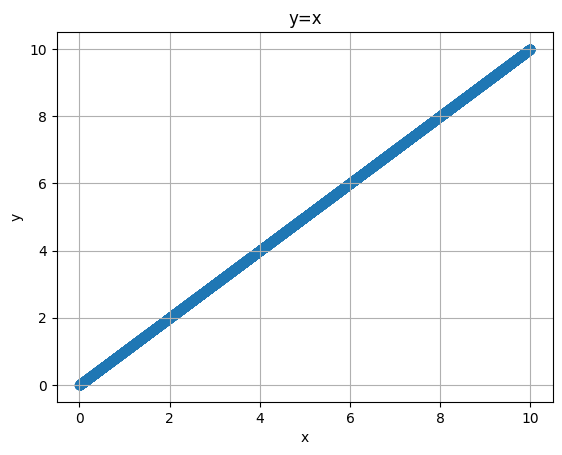

Text(0, 0.5, 'probabilitat')

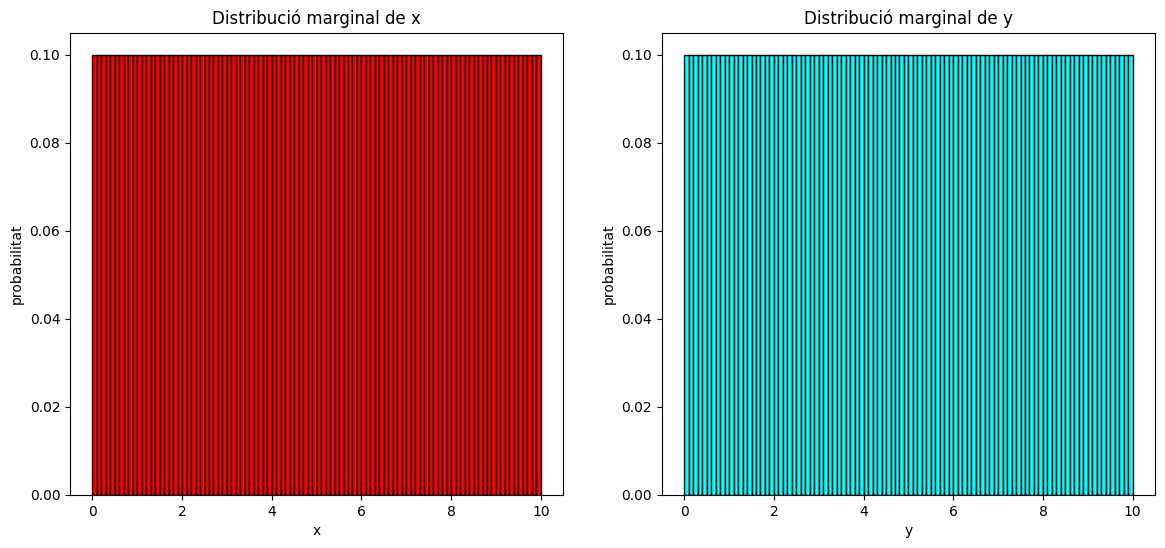

In [136]:
N = 10000

x = np.linspace(0,10,N)
y = x

plt.figure()
plt.scatter(x,y)
plt.title('y=x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(x, bins=100, edgecolor='black', color='red', density=True)
plt.title('Distribució marginal de x')
plt.xlabel('x')
plt.ylabel('probabilitat')

plt.subplot(1,2,2)
plt.hist(y, bins=100, edgecolor='black', color='cyan', density=True)
plt.title('Distribució marginal de y')
plt.xlabel('y')
plt.ylabel('probabilitat')

2) Fes una gràfica d'un conjunt de $N = 10000$ punts $(x,y)$ on els x estan equiespaiats en l'interval $[0,10]$ i $y_i = x_i + \epsilon_i$, on $\epsilon_i \sim N(0,Z)$ (és a dir, segueix una distribució normal, amb $\mu$ = 0 i $\sigma$ = Z) **[1.5 punts]**. També fes un parell de gràfiques de les distribucions marginals en $x$ i $y$, fent histogrames amb 100 bins. **[1.5 punts]**

<font color='orange'>**Nota**</font> Vam veure que podíem trobar informació sobre les funcions de la normal a scipy amb

`?stats.norm`

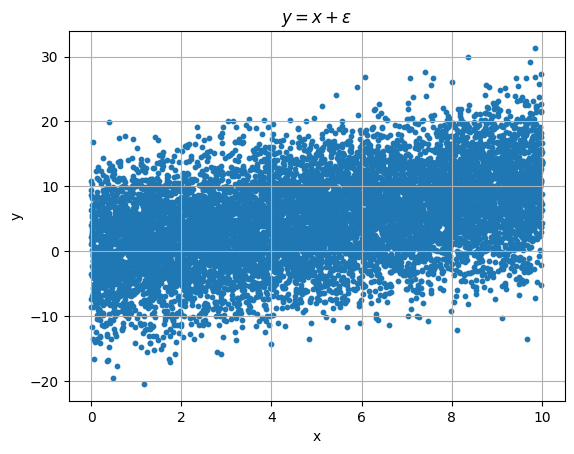

Text(0, 0.5, 'probabilitat')

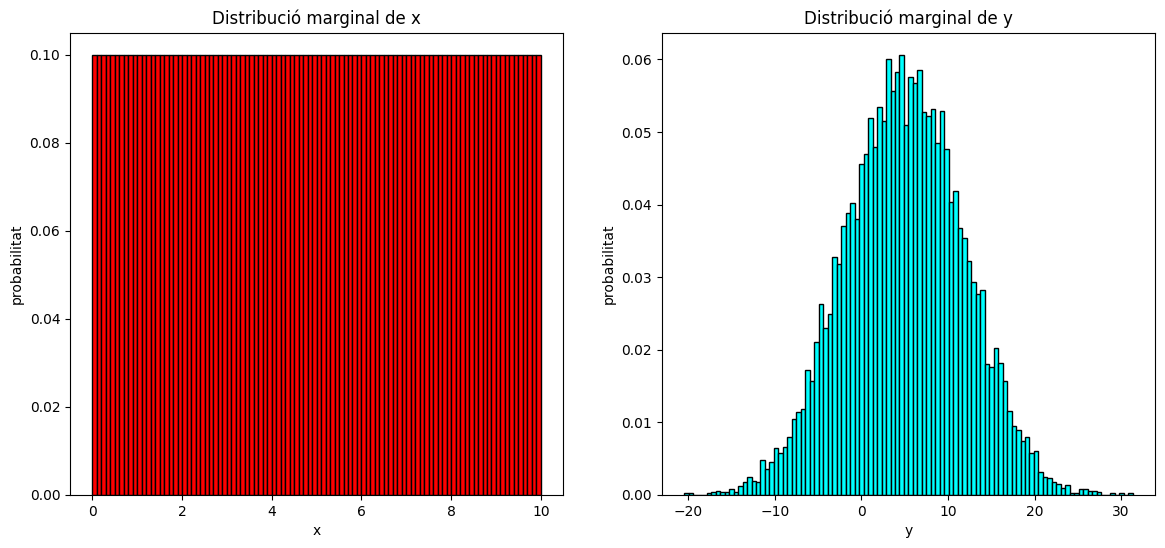

In [137]:
Z=61/10

y_norm = x + stats.norm.rvs(loc=0, scale=Z, size=N)

plt.figure()
plt.scatter(x,y_norm, s=10)
plt.title(r'$y = x + \epsilon$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(x, bins=100, edgecolor='black', color='red', density=True)
plt.title('Distribució marginal de x')
plt.xlabel('x')
plt.ylabel('probabilitat')

plt.subplot(1,2,2)
plt.hist(y_norm, bins=100, edgecolor='black', color='cyan', density=True)
plt.title('Distribució marginal de y')
plt.xlabel('y')
plt.ylabel('probabilitat')

3) Calcula el factor de correlació entre les variables $x$ i $y$ que has generat en els dos exemples. **[2 punts]**

<font color='orange'>**Nota**</font> Python té la funció $pearsonr$ per a calcular la correlació entre variables:

```
from scipy.stats import pearsonr
```
`?stats.pearsonr`

In [138]:
corr_y, _ = pearsonr(x,y)
corr_y_norm, _ = pearsonr(x,y_norm)

display(Math(f"\\text{{El valor de correlació entre }} x \\text{{ i }} y \\text{{ per la }} y \\text{{ amb }} \\epsilon=0 \\text{{ és }} {corr_y}"))
display(Math(f"\\text{{El valor de correlació entre }} x \\text{{ i }} y \\text{{ per la }} y \\text{{ amb }} \\epsilon \\sim N(0, {Z}) \\text{{ és }} {corr_y_norm}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

4) Aproximadament quina $\sigma$ ha de tenir el soroll perquè el factor de correlació sigui menor de 0.15? Genera moltes realitzacions amb soroll diferent i calcula el factor de correlació per a cadascuna d'elles per a trobar el cas que es proposa. **[2 punts]**

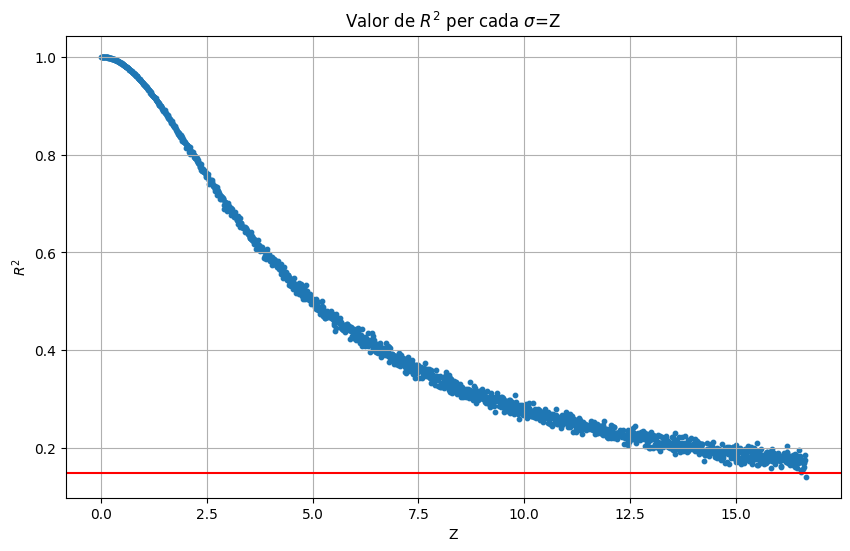

El valor de Z per a una correlació menor de 0.15 és: 16.659999999999805


In [139]:
Z_val = []
corr_val = []

Z = 0
corr_y_z = 1

while corr_y_z >= 0.15:
  y_z = x + stats.norm.rvs(loc=0, scale=Z, size=N)
  corr_y_z, _ = pearsonr(x, y_z)

  Z_val.append(Z)
  corr_val.append(corr_y_z)

  Z += 0.01

plt.figure(figsize=(10,6))
plt.scatter(Z_val, corr_val, s=10)
plt.title('Valor de $R^2$ per cada $\sigma$=Z')
plt.xlabel('Z')
plt.ylabel('$R^2$')
plt.grid(True)
plt.axhline(y=0.15, color='red', linestyle='-')
plt.show()

print(f"El valor de Z per a una correlació menor de 0.15 és: {Z}")

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr2_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr2_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr2_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr2_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>